<a href="https://colab.research.google.com/github/SVithurabiman/ComputerVisionProjects/blob/main/Dust_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
%cp -r /content/drive/MyDrive/picture3/. /content/

In [ ]:
%cp -r  '/content/drive/MyDrive/circlek videos/Images/.' /content/

In [ ]:
pip install Pillow

In [ ]:
def slow_horizontal_variance(im):

    width, height = im.size
    if not width or not height: return 0
    vars = []
    pix = im.load()
    for y in range(height):
        row = [pix[x,y] for x in range(width)]
        mean = sum(row)/width
        variance = sum([(x-mean)**2 for x in row])/width
        vars.append(variance)
    return sum(vars)/height

 1675 - NOT SNOWY - /content/8.png


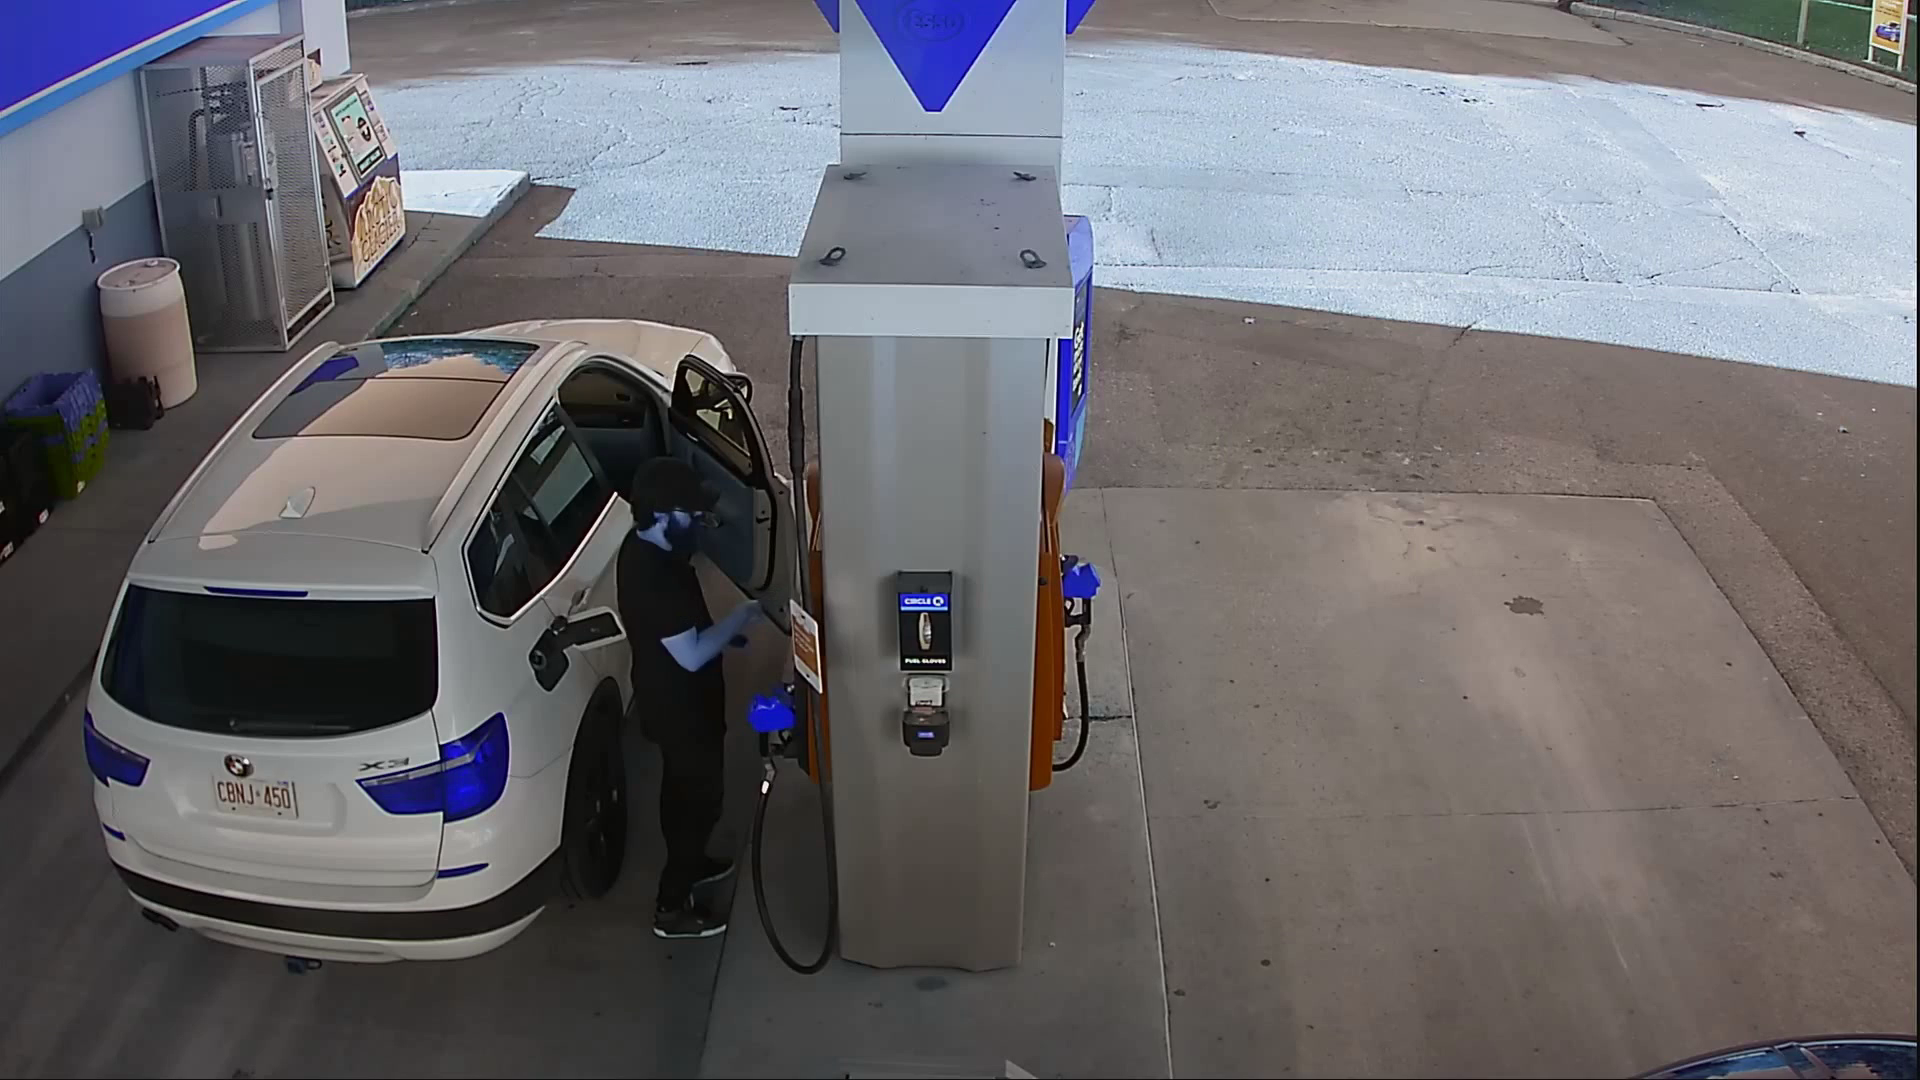

 1675 - NOT SNOWY - /content/8.png


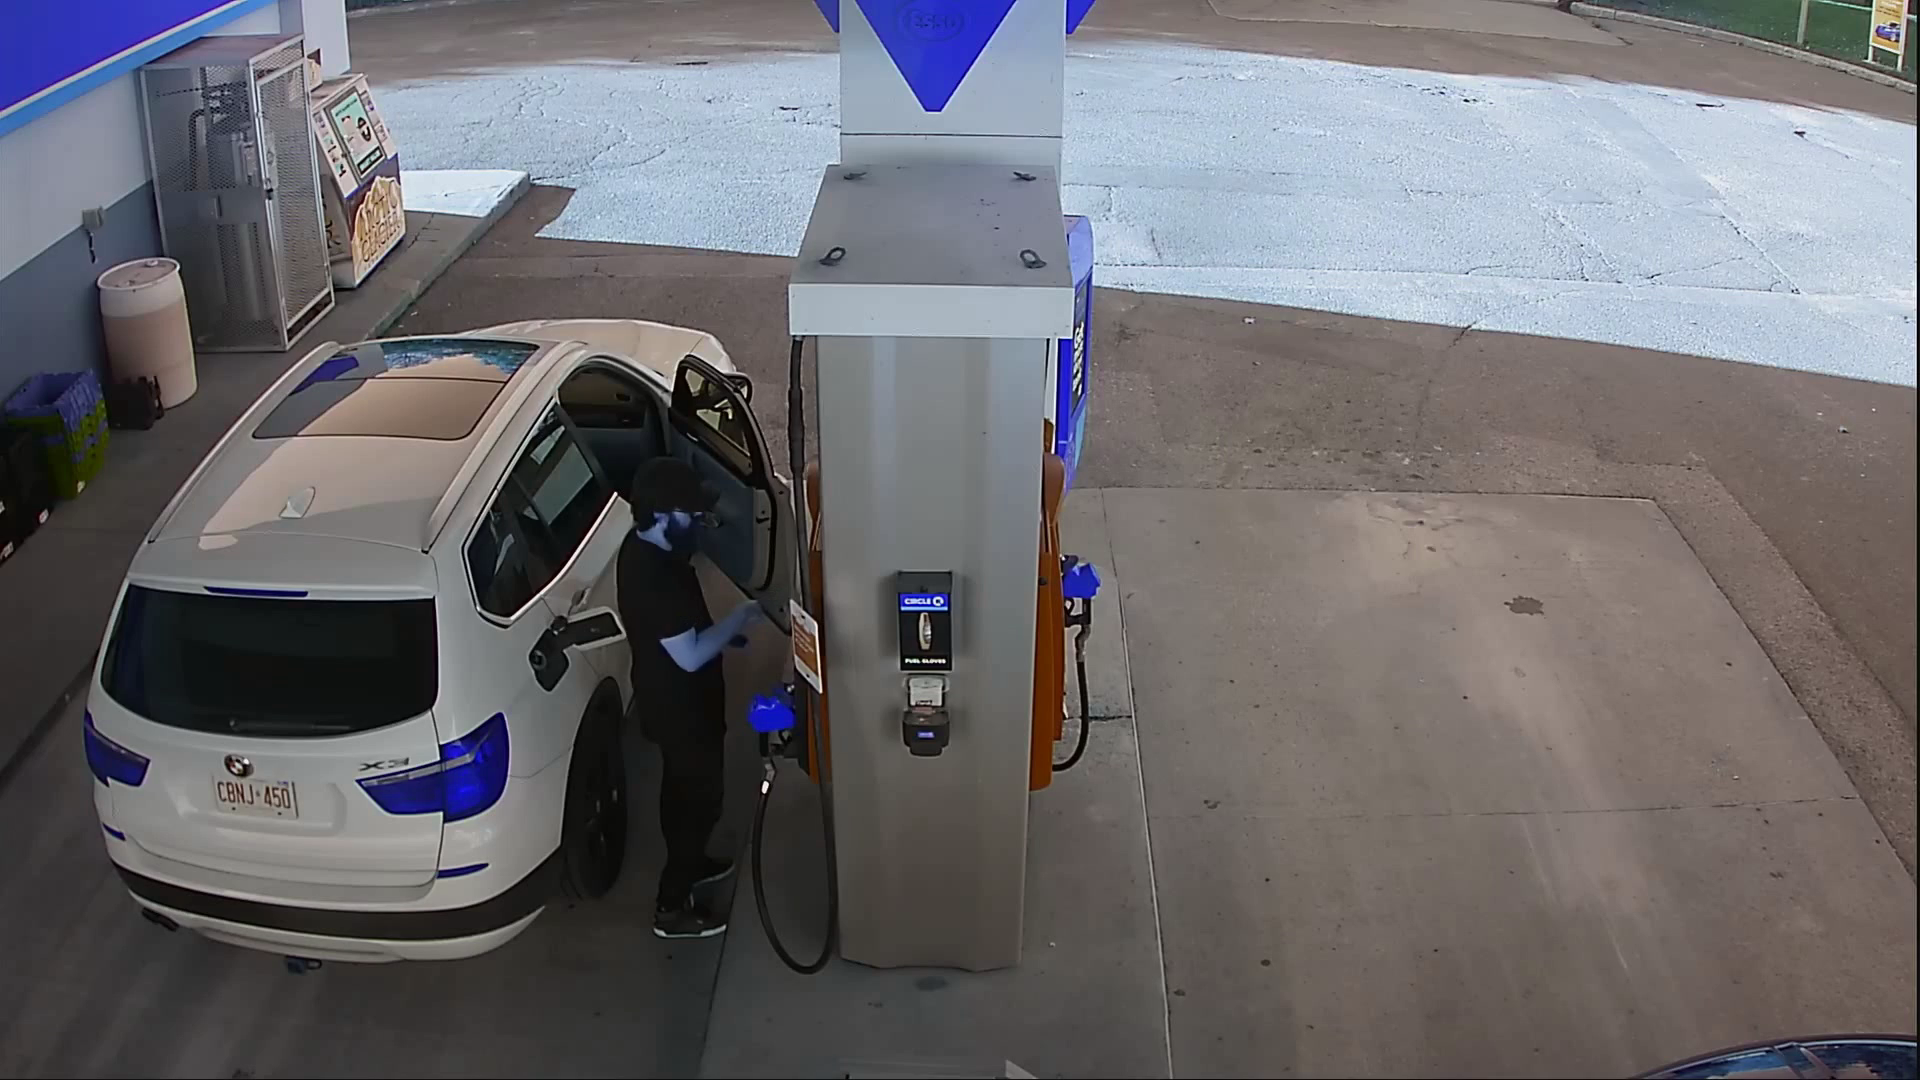

 1675 - NOT SNOWY - /content/8.png


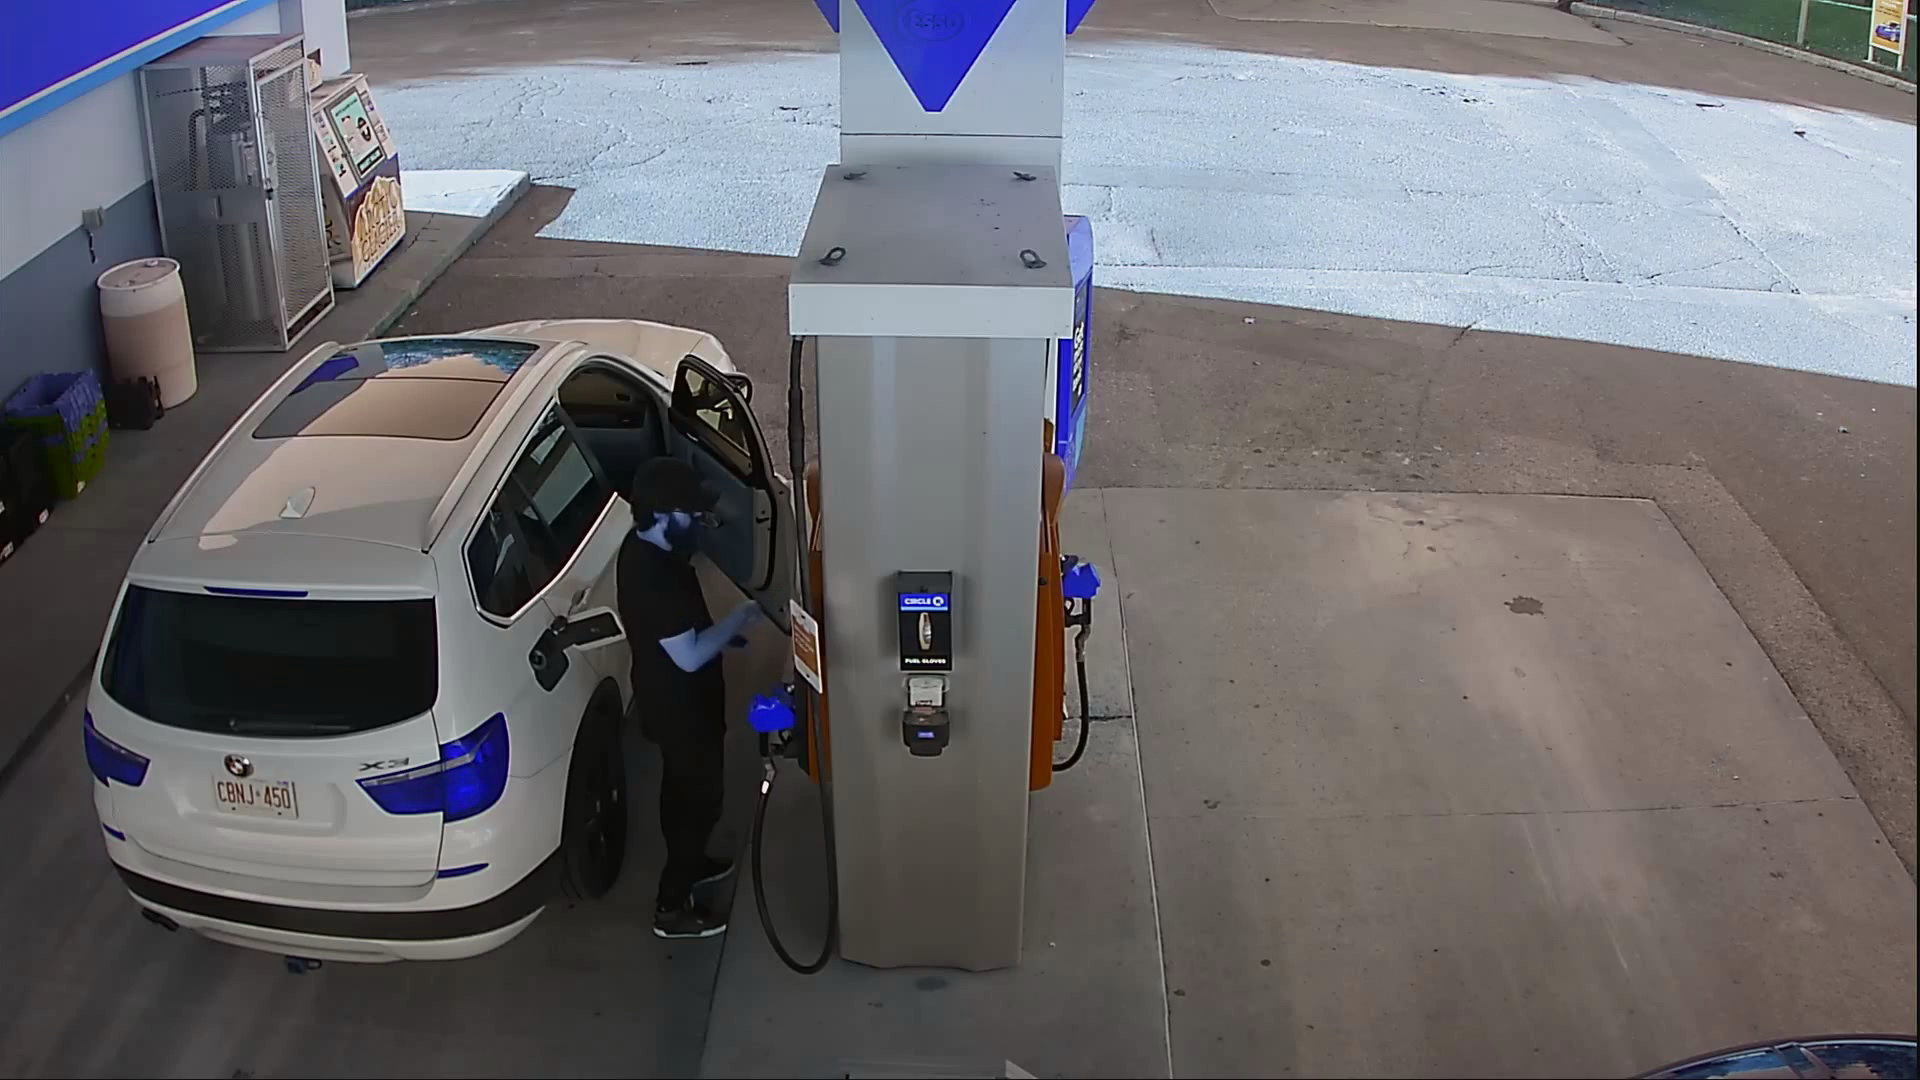

 1675 - NOT SNOWY - /content/8.png


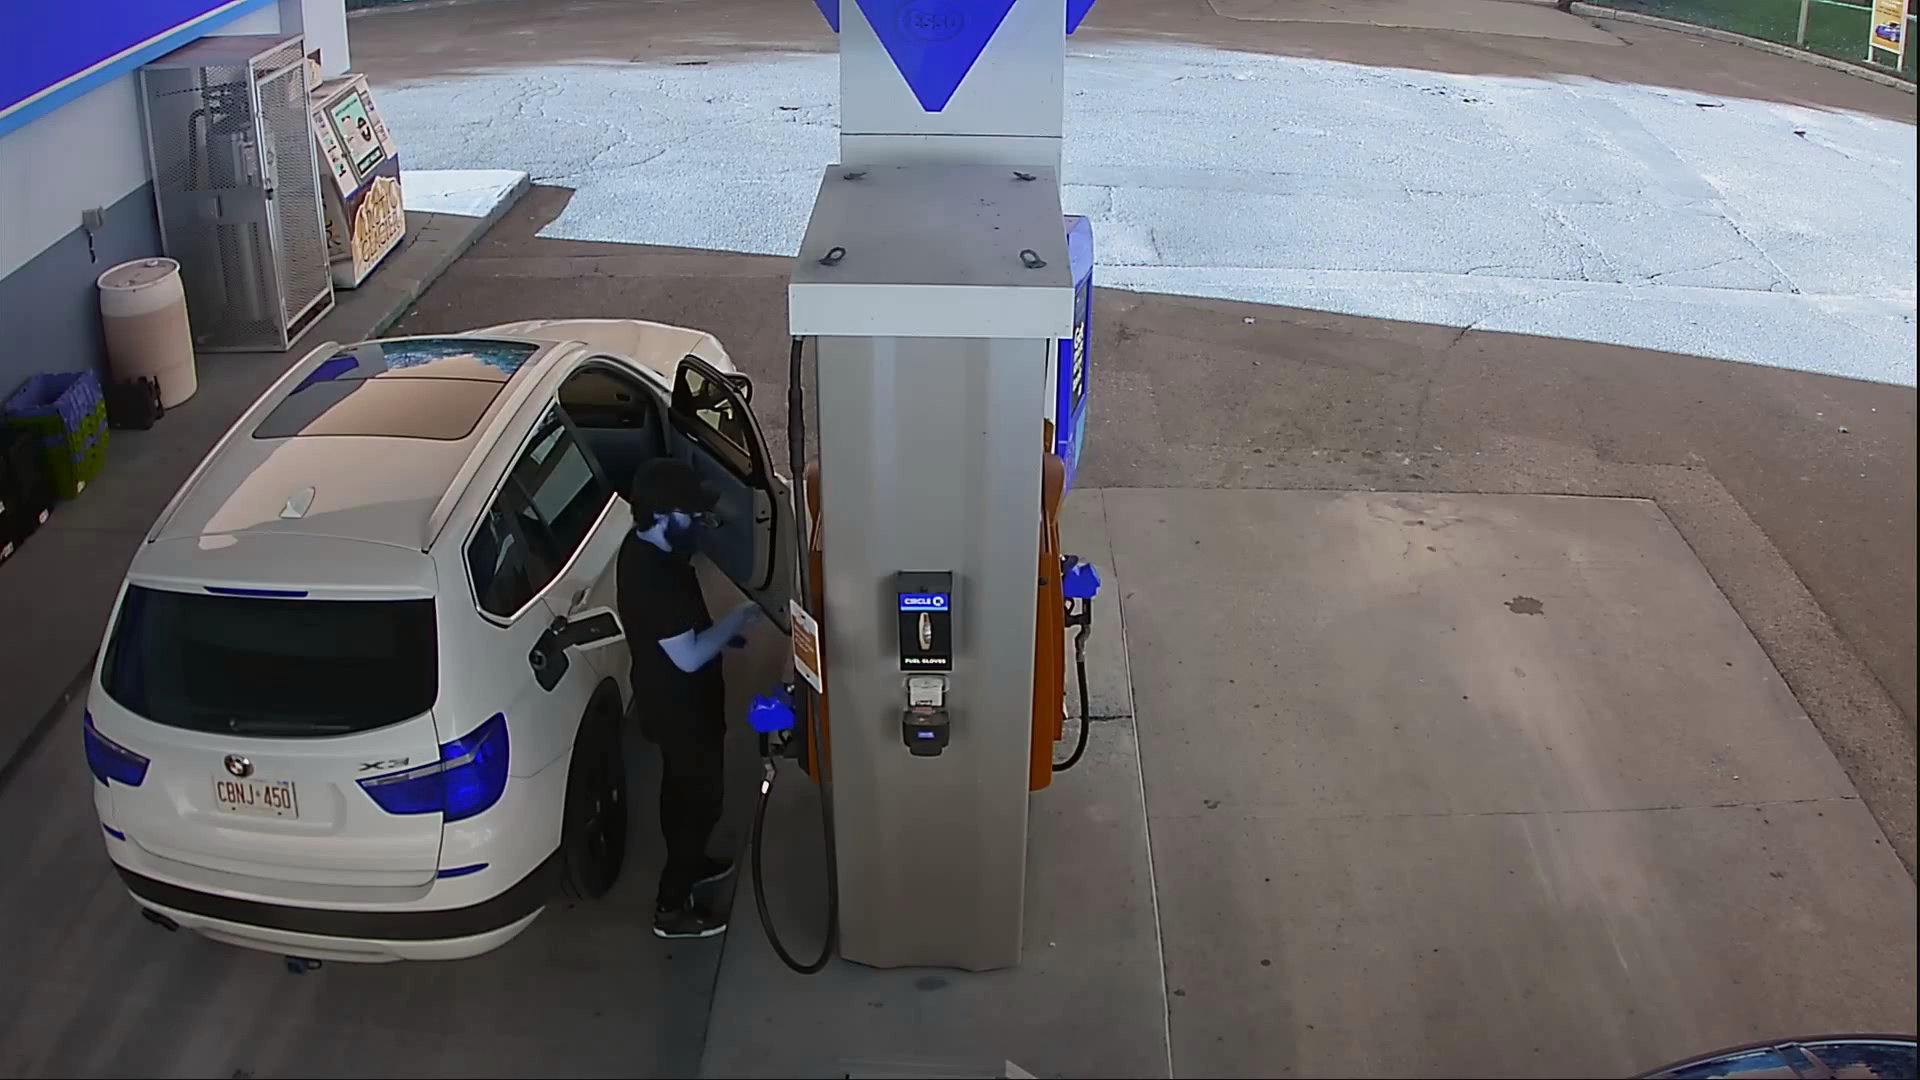

 1675 - NOT SNOWY - /content/8.png


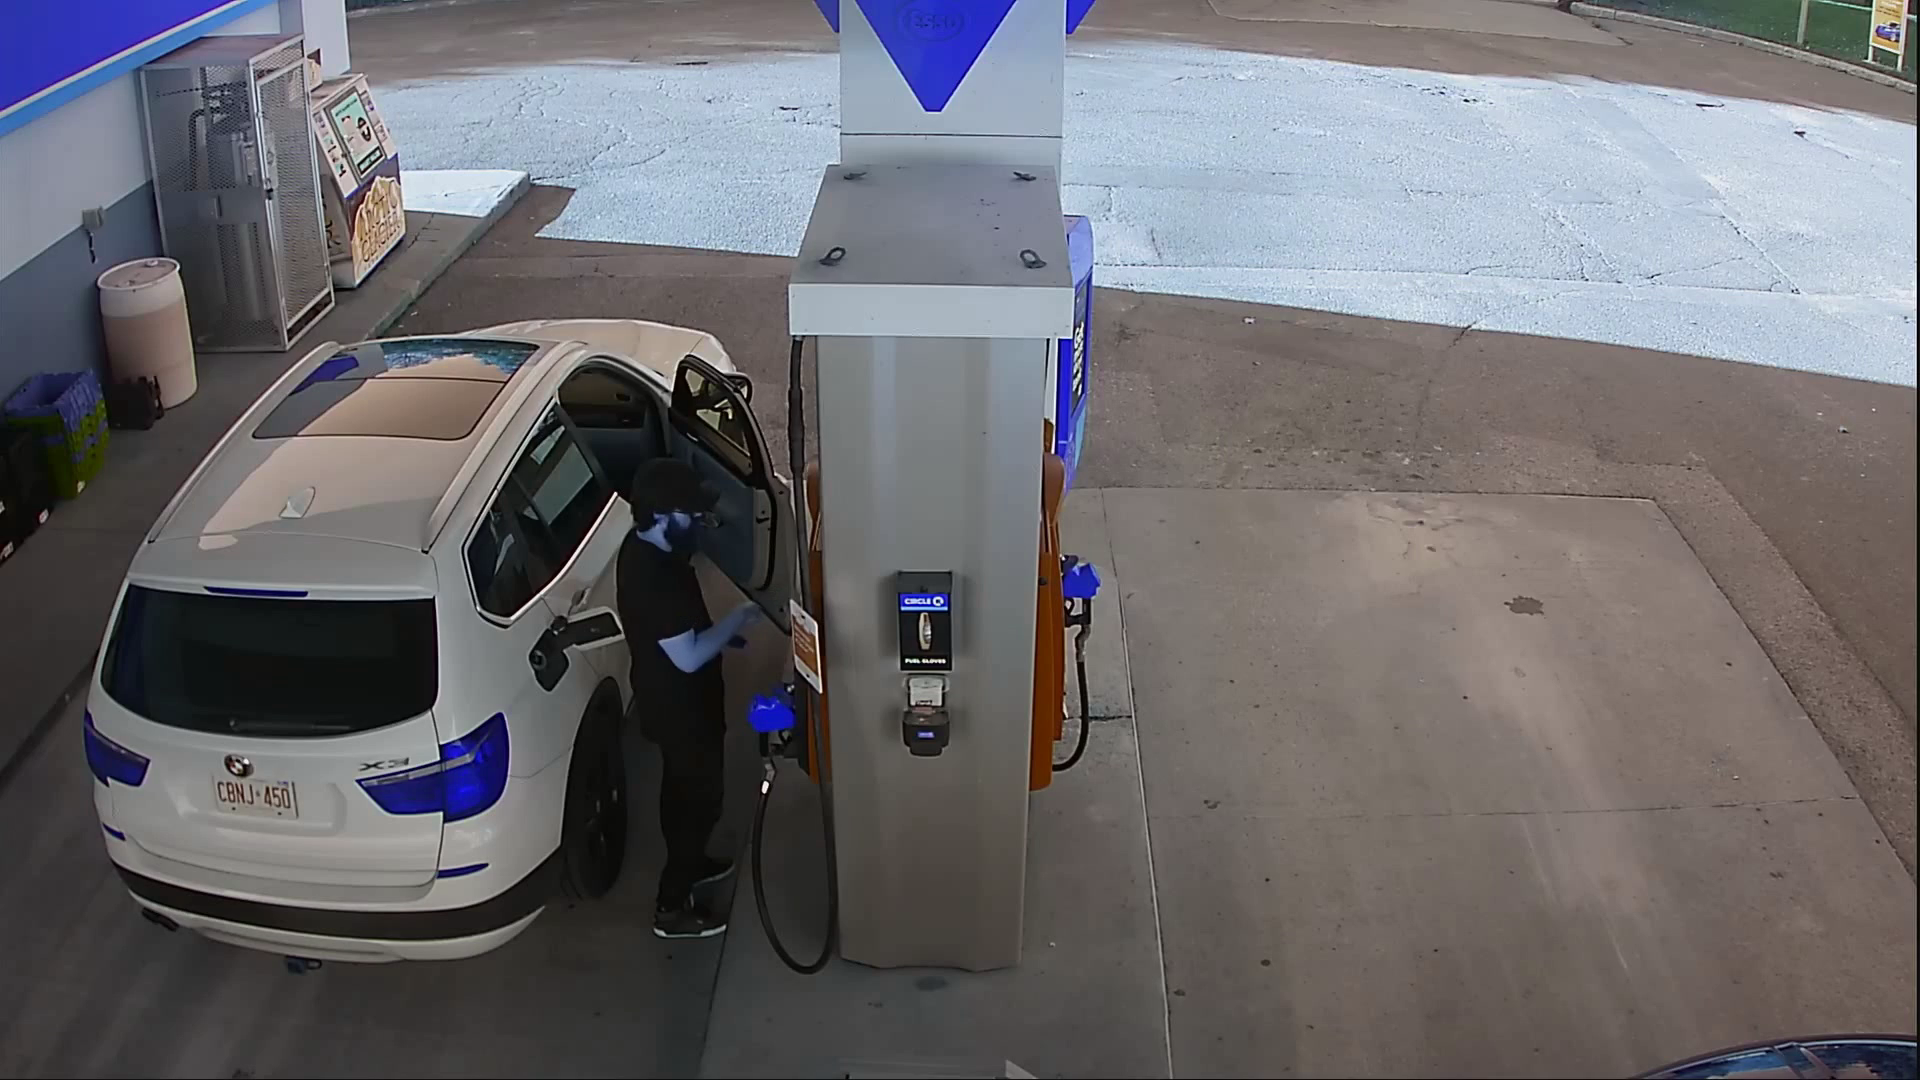

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
video_path='rtsp://backend2.interplay.iterate.ai/test4.sdp'
vid = cv2.VideoCapture(video_path)
frame_num=1
while True:
  return_value, frame = vid.read()
  if return_value:
    frame_num+=1
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(frame).convert('L')
    var = slow_horizontal_variance(im)
 
    fog = var < 700    # FOG THRESHOLD
    print ('%5.0f - %5s - %s' % (var, fog and 'SNOWY' or 'NOT SNOWY', fn))
    cv2_imshow(frame)
    name=str(frame_num)+'.jpg'
    cv2.imwrite(name,frame)
  if frame_num>5:
    break

In [ ]:
 from PIL import Image

In [ ]:
fn='/content/8.png'


1422.349707231185
 1422 - NOT SNOWY - /content/8.png


# Decompostion

In [ ]:
!pip install PyWavelets

In [ ]:
!pip install cr-sparse

     |████████████████████████████████| 241 kB 5.1 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 


In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import cv2
import pywt
import  pywt.data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img=cv2.imread("/content/0.png",cv2.IMREAD_ANYCOLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
coeff=pywt.wavedec2(img,'db5',mode="periodization",level=3)
cA3=coeff[0]
(cH1,cV1,cD1)=coeff[-1]
(cH2,cV2,cD2)=coeff[-2]
(cH3,cV3,D3)=coeff[-3]

In [ ]:
img.shape

(1080, 1353)

In [ ]:
cH.shape

(540, 677)

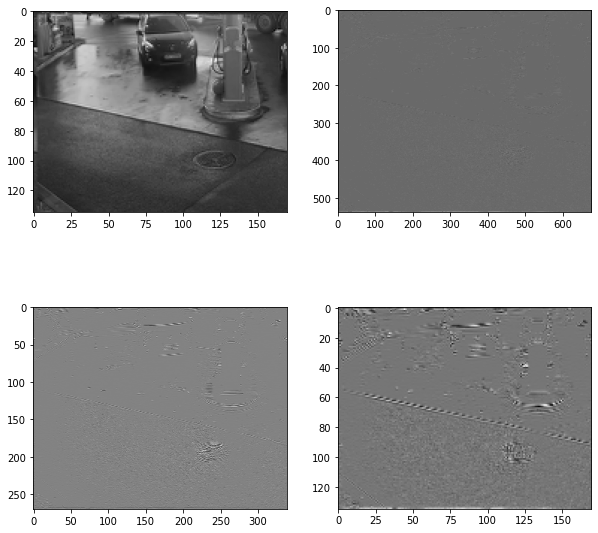

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(cA3, cmap=plt.cm.gray)
plt.subplot(2,2,2)
plt.imshow(cH3, cmap=plt.cm.gray)
plt.subplot(2,2,3)
plt.imshow(cH3, cmap=plt.cm.gray)
plt.subplot(2,2,4)
plt.imshow(cH3, cmap=plt.cm.gray)
plt.show()